# 06 Differentiation – Student Activity
See *Computational Physics* (Landau, Páez, Bordeianu), Chapter 5.5

## Implementation of Finite Difference Algorithms in Python

*Forward difference* and *central difference* (discussed in class):

\begin{align}
D_\text{fd} y(t) &\equiv \frac{y(t+h) - y(t)}{h} \\
D_\text{cd} y(t) &\equiv \frac{y\Big(t + \frac{h}{2}\Big) - y\Big(t - \frac{h}{2}\Big)}{h}
\end{align}

and also the *extended difference algorithm*

\begin{align}
D_\text{ep} y(t) &\equiv \frac{4 D_\text{cd}y(t, h/2) - D_\text{cd}y(t, h)}{3} \\
  &= \frac{8\big(y(t+h/4) - y(t-h/4)\big) - \big(y(t+h/2) - y(t-h/2)\big)}{3h}
\end{align}


In [1]:
def D_fd(y, t, h):
    """Forward difference"""
    return (y(t + h) - y(t))/h

def D_cd(y, t, h):
    """Central difference"""
    return (y(t+(h/2))-y(t-(h/2)))/h

def D_ep(y, t, h):
    """Extended difference"""
    return (8*(y(t+(h/4))-y(t-(h/4)))-(y(t+(h/2))-y(t-(h/2))))/(3 * h)

### Test your implementations
Test function: $y(t) = \cos t$
1. What is the analytical derivative $\frac{d\cos(t)}{dt}$?
1. Calculate the derivative of $y(t) = \cos t$ at $t=0.1, 1, 100$.
1. Print derivative and relative error $E = \frac{D y(t) - y^{(1)}(t)}{y^{(1)}}$ (compared to the analystical value – use numpy functions for "exact" values) as function of $h$.
1. Reduce $h$ until you reach machine precision, $h \approx \epsilon_m$
1. Plot $\log_{10} |E(h)|$ against $\log_{10} h$.

Try to do the above for all three algorithms

#### Function definitions 

In [10]:
import numpy as np
# test function
y = np.cos

# Analytical derivative (use np.cos, np.sin, np.exp or whatever else you need)
def y2(t):
    return -np.sin(t)
    pass

t_values = np.array([0.1, 1, 100], dtype=np.float64)
t_values

array([   0.1,    1. ,  100. ])

Use numpy functions for everything because then you can operate on all `t_values` at once.

#### Evaluate the finite difference derivatives
Note that we pass *a function* `y` to the forward difference function `D_fd` and we can also pass a whole array of `t_values`!

In [3]:
print (D_fd(y, t_values, 0.1))
print (D_fd(y, t_values, 1e-12))

[-0.14937587 -0.86706184  0.46244209]
[-0.09980905 -0.84154905  0.50359716]


#### Evaluate the exact derivatives
Compute the exact derivatives (again, operate on all $t$ together... start thinking in numpy arrays!)

In [4]:
y2(t_values)

array([-0.09983342, -0.84147098,  0.50636564])

Calculation of the **absolute error**: subtract the two arrays that you got previously:

In [11]:
abs_err = y2(t_values) - D_fd(y, t_values, 0.1)
abs_err

array([ 0.04954246,  0.02559086,  0.04392355])

#### Calculate the relative error $E$

In [26]:
def error(Dxx, y, y2, t, h):
    """Relative error."""
    (Dxx(y, t, h) - y2(t))/y2(t)
    return

Note that we pass again a general function for the difference operator so that we can use `error()` with `D_fd()`, `D_cd()` and `D_ep()`.

In [31]:
err = error(D_fd, y, y2, t_values, 0.1)
print (err)

None


#### Plot $|E|$
Plot $\log_{10} |E(h)|$ against $\log_{10} h$.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
h_values = 10**(np.arange(-15, -1, 0.1))
abs_errors = np.abs(error(D_fd, y, y2, 0.1, h_values))

TypeError: bad operand type for abs(): 'NoneType'

ValueError: x and y must not be None

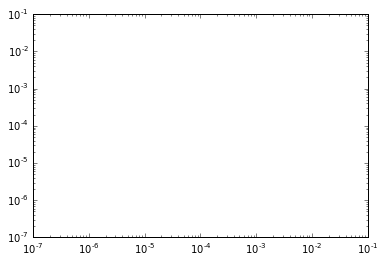

In [30]:
# INCOMPLETE, replace None with appropriate terms
plt.loglog(None, None, label="t=0.1")

Plot the three different $t$ values together in one plot:

In [ ]:
# INCOMPLETE: replace None values by appropriate terms
for t in t_values:
    abs_errors = None
    plt.loglog(None, None, label=r"$t={}$".format(t))
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E|$")

* error behavior depends on $t$ and on cancellation of errors (e.g. for $t=1$
* algorithmic error decreases for decreasing $h$ until the round of error starts dominating